<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from numpy.random import RandomState
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv') 
data_test = pd.read_csv('/datasets/gold_industry_test.csv') 
data_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14579 entries, 0 to 14578

Data columns (total 87 columns):

 #   Column                                              Non-Null Count  Dtype  

---  ------                                              --------------  -----  

 0   date                                                14579 non-null  object 

 1   rougher.input.feed_au                               14579 non-null  float64

 2   rougher.input.feed_ag                               14579 non-null  float64

 3   rougher.input.feed_pb                               14507 non-null  float64

 4   rougher.input.feed_sol                              14502 non-null  float64

 5   rougher.input.feed_rate                             14572 non-null  float64

 6   rougher.input.feed_size                             14478 non-null  float64

 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64

 8   rougher.input.floatbank10_xanthate                  14572 non-n

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 4860 entries, 0 to 4859

Data columns (total 53 columns):

 #   Column                                      Non-Null Count  Dtype  

---  ------                                      --------------  -----  

 0   date                                        4860 non-null   object 

 1   rougher.input.feed_au                       4860 non-null   float64

 2   rougher.input.feed_ag                       4860 non-null   float64

 3   rougher.input.feed_pb                       4832 non-null   float64

 4   rougher.input.feed_sol                      4838 non-null   float64

 5   rougher.input.feed_rate                     4856 non-null   float64

 6   rougher.input.feed_size                     4816 non-null   float64

 7   rougher.input.floatbank10_sulfate           4857 non-null   float64

 8   rougher.input.floatbank10_xanthate          4859 non-null   float64

 9   rougher.state.floatbank10_a_air             4859 non-null   float64

 1

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 19439 entries, 0 to 19438

Data columns (total 87 columns):

 #   Column                                              Non-Null Count  Dtype  

---  ------                                              --------------  -----  

 0   date                                                19439 non-null  object 

 1   rougher.input.feed_au                               19439 non-null  float64

 2   rougher.input.feed_ag                               19439 non-null  float64

 3   rougher.input.feed_pb                               19339 non-null  float64

 4   rougher.input.feed_sol                              19340 non-null  float64

 5   rougher.input.feed_rate                             19428 non-null  float64

 6   rougher.input.feed_size                             19294 non-null  float64

 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64

 8   rougher.input.floatbank10_xanthate                  19431 non-n

# Проверка на дубликаты

In [6]:
print('Количество дубликатов в data_train:', data_train.duplicated().sum())

Количество дубликатов в data_train: 0


In [7]:
print('Количество дубликатов в data_test:', data_test.duplicated().sum())

Количество дубликатов в data_test: 0


In [8]:
print('Количество дубликатов в data_full:', data_full.duplicated().sum())

Количество дубликатов в data_full: 0


# Описательная статистика для каждого датасета

In [9]:
data_train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [10]:
data_test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [11]:
data_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


In [12]:
datasets = [data_train, data_test, data_full]

for dataset in datasets:
    missing_values = dataset.isna().sum()
    print("Пропуски в датасете:")
    print(missing_values)
    print("\n")

Пропуски в датасете:

date                       0

rougher.input.feed_au      0

rougher.input.feed_ag      0

rougher.input.feed_pb     72

rougher.input.feed_sol    77

                          ..

final.output.recovery      0

final.output.tail_au       0

final.output.tail_ag       1

final.output.tail_pb      75

final.output.tail_sol      5

Length: 87, dtype: int64





Пропуски в датасете:

date                                            0

rougher.input.feed_au                           0

rougher.input.feed_ag                           0

rougher.input.feed_pb                          28

rougher.input.feed_sol                         22

rougher.input.feed_rate                         4

rougher.input.feed_size                        44

rougher.input.floatbank10_sulfate               3

rougher.input.floatbank10_xanthate              1

rougher.state.floatbank10_a_air                 1

rougher.state.floatbank10_a_level               1

rougher.state.floatbank10_b_air    

# Высчитываем MAE

In [13]:
concentrate_au = data_train['rougher.output.concentrate_au']
feed_au = data_train['rougher.input.feed_au']
tail_au = data_train['rougher.output.tail_au']
recovery = data_train['rougher.output.recovery']
calculated = (concentrate_au * (feed_au - tail_au) / feed_au / (concentrate_au - tail_au) * 100)
print('Эффективность обогащения:', calculated)
print('MAE:', mean_absolute_error(recovery, calculated))

Эффективность обогащения: 0        87.107763

1        86.843261

2        86.842308

3        87.226430

4        86.688794

           ...    

14574    87.684717

14575    90.677361

14576    89.574376

14577    87.724007

14578    88.890579

Length: 14579, dtype: float64

MAE: 1.0851689485498649e-14


MAE (Mean Absolute Error) в значении 1.0851689485498649e-14 близка к нулю и практически равна нулю. Это говорит о том, что ougher.output.recovery совпадает с данными из столбца.

In [14]:
#Проверим пропуски
good_train = data_train
good_train.fillna(method='ffill', inplace=True)
print('Количество пропусков:', good_train.isna().sum())

Количество пропусков: date                      0

rougher.input.feed_au     0

rougher.input.feed_ag     0

rougher.input.feed_pb     0

rougher.input.feed_sol    0

                         ..

final.output.recovery     0

final.output.tail_au      0

final.output.tail_ag      0

final.output.tail_pb      0

final.output.tail_sol     0

Length: 87, dtype: int64


In [15]:
#Проверим пропуски
good_test = data_test
good_test.fillna(method='ffill', inplace=True)
print('Количество пропусков:', good_test.isna().sum())

Количество пропусков: date                                          0

rougher.input.feed_au                         0

rougher.input.feed_ag                         0

rougher.input.feed_pb                         0

rougher.input.feed_sol                        0

rougher.input.feed_rate                       0

rougher.input.feed_size                       0

rougher.input.floatbank10_sulfate             0

rougher.input.floatbank10_xanthate            0

rougher.state.floatbank10_a_air               0

rougher.state.floatbank10_a_level             0

rougher.state.floatbank10_b_air               0

rougher.state.floatbank10_b_level             0

rougher.state.floatbank10_c_air               0

rougher.state.floatbank10_c_level             0

rougher.state.floatbank10_d_air               0

rougher.state.floatbank10_d_level             0

rougher.state.floatbank10_e_air               0

rougher.state.floatbank10_e_level             0

rougher.state.floatbank10_f_air               0

1. **Параметры этапов (столбцы `rougher.output`, `rougher.calculation`, `final.output`, `primary_cleaner.output`, `secondary_cleaner.output`):** Эти признаки связаны с разными этапами технологического процесса обработки золотосодержащей руды. Они могут включать в себя параметры, связанные с концентрацией золота, химическими реагентами и другими параметрами, которые изменяются на разных этапах обработки. Эти признаки, вероятно, являются числовыми или категориальными.

2. **Целевые признаки (столбцы, которые нужно предсказать, такие как `rougher.output.recovery` и `final.output.recovery`):** В тестовой выборке отсутствуют целевые признаки, которые нужно предсказать с помощью модели. Эти признаки обычно являются числовыми и представляют собой эффективность обогащения золота на разных этапах процесса.

Эти параметры и целевые признаки играют ключевую роль в задаче предсказания эффективности обогащения золота. Их отсутствие в тестовой выборке может быть вызвано тем, что данные для них могут быть собраны и добавлены позже, после того, как проведены исследования и обработка сырья на различных этапах процесса.

In [16]:
good_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [17]:
good_test.columns

Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'prim

In [18]:
#Определение общего множества признаков из тестовой выборки (кроме 'date')
all_features = good_test.columns[1:]

#Признаки для предсказания rougher.output.recovery (из столбцов rougher)
rougher_features = set(all_features[12:34])

#Признаки для предсказания final.output.recovery (все признаки)
final_features = set(all_features)

print("Признаки для rougher.output.recovery:")
print(rougher_features)
print("\nПризнаки для final.output.recovery:")
print(final_features)


Признаки для rougher.output.recovery:

{'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_f_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.feed_size', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_c_level', 'rougher.input.floatbank11_sulfate', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_c_air', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_d_air', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.input.sulfate', 'primary_cleaner.state.floatbank8_d_level', 'rougher.state.floatbank10_d_level', 'primary_cleaner.input.depressant', 'rougher.state.floatbank10_c_level'}



Признаки для final.output.recovery:

{'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.float

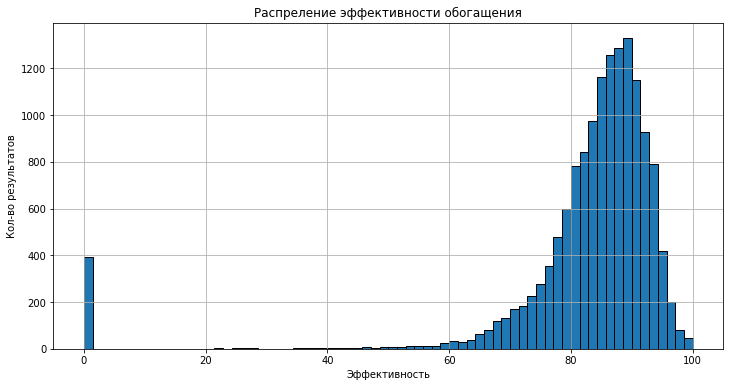

In [19]:
#Построение гистрограмы
plt.figure(figsize=(12, 6))
plt.hist(good_train['rougher.output.recovery'], bins=70, edgecolor='k')
plt.title('Распреление эффективности обогащения')
plt.xlabel('Эффективность')
plt.ylabel('Кол-во результатов')
plt.grid(True)
plt.show()

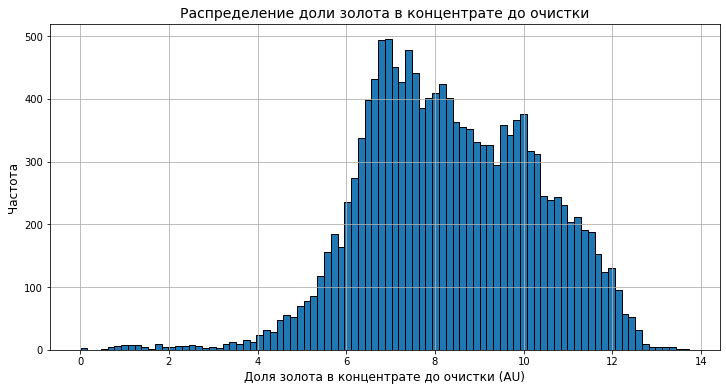

In [20]:
# Постройте гистограмму
plt.figure(figsize=(12, 6))
plt.hist(data_train['rougher.input.feed_au'], bins=90, edgecolor='k')
plt.title('Распределение доли золота в концентрате до очистки', fontsize=14)
plt.xlabel('Доля золота в концентрате до очистки (AU)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)
plt.show()

Много нулевых значений, нужно подробнее их разобрать

In [21]:
good_train[good_train['rougher.output.recovery'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
36,2016-01-16 12:00:00,7.114065,7.521974,2.811569,41.154430,581.605260,65.620714,13.322740,7.504592,999.026619,...,9.545239,46.614456,4.566664,10.406178,4.588698,68.403877,2.509776,10.705777,1.509070,17.875134
37,2016-01-16 13:00:00,7.651522,7.313187,2.973841,41.983063,562.972841,66.014780,14.433889,7.583598,999.846655,...,9.734058,46.250638,4.577832,10.691605,5.274175,70.675633,2.540843,10.728531,1.641216,18.349339
38,2016-01-16 14:00:00,5.587750,7.934791,1.763437,41.983063,229.379445,40.601032,10.865871,5.648950,1003.354806,...,9.601115,46.663335,4.591462,10.628846,5.688961,55.088448,2.686782,10.694584,1.671644,17.910312
39,2016-01-16 15:00:00,4.752992,7.756881,1.025762,11.816724,228.510521,41.248945,5.908582,5.048482,998.548594,...,6.810654,44.015642,5.296830,10.597469,5.688961,41.962008,2.889469,11.975654,1.846558,8.138408
40,2016-01-16 16:00:00,5.122801,5.393466,1.824835,28.380274,550.606559,45.329106,10.060214,7.758600,1000.013401,...,5.176456,40.715973,8.162896,8.877528,5.688961,49.884856,2.739224,10.381465,1.024030,12.974257


In [22]:
good_train[good_train['rougher.output.concentrate_au'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
36,2016-01-16 12:00:00,7.114065,7.521974,2.811569,41.154430,581.605260,65.620714,13.322740,7.504592,999.026619,...,9.545239,46.614456,4.566664,10.406178,4.588698,68.403877,2.509776,10.705777,1.509070,17.875134
37,2016-01-16 13:00:00,7.651522,7.313187,2.973841,41.983063,562.972841,66.014780,14.433889,7.583598,999.846655,...,9.734058,46.250638,4.577832,10.691605,5.274175,70.675633,2.540843,10.728531,1.641216,18.349339
38,2016-01-16 14:00:00,5.587750,7.934791,1.763437,41.983063,229.379445,40.601032,10.865871,5.648950,1003.354806,...,9.601115,46.663335,4.591462,10.628846,5.688961,55.088448,2.686782,10.694584,1.671644,17.910312
39,2016-01-16 15:00:00,4.752992,7.756881,1.025762,11.816724,228.510521,41.248945,5.908582,5.048482,998.548594,...,6.810654,44.015642,5.296830,10.597469,5.688961,41.962008,2.889469,11.975654,1.846558,8.138408
40,2016-01-16 16:00:00,5.122801,5.393466,1.824835,28.380274,550.606559,45.329106,10.060214,7.758600,1000.013401,...,5.176456,40.715973,8.162896,8.877528,5.688961,49.884856,2.739224,10.381465,1.024030,12.974257


In [23]:
#good_train = good_train.drop(good_train[good_train['rougher.output.recovery'] == 0].index)

#Вывод первых строк обновленного датасета, где 'rougher.output.recovery' < 1
#good_train[good_train['rougher.output.recovery'] < 1].head()

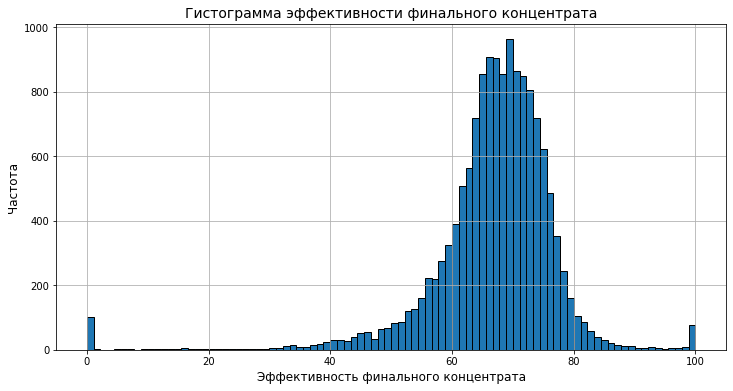

In [24]:
#Построим гистограмму эффективности финального концентрата
plt.figure(figsize=(12, 6))
plt.hist(good_train['final.output.recovery'], bins=90, edgecolor='k')
plt.title('Гистограмма эффективности финального концентрата', fontsize=14)
plt.xlabel('Эффективность финального концентрата', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)
plt.show()

In [25]:
good_train[good_train['final.output.recovery'] < 1].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
516,2016-02-08 00:00:00,5.598971,7.407737,1.934178,31.762853,500.087438,51.965198,10.251319,6.620908,999.884600,...,10.651508,0.000000,0.000000,0.000000,0.000000,0.000000,1.779052,8.894029,0.843584,15.417342
831,2016-02-22 01:00:00,4.132606,8.552262,1.613576,30.373429,21.293760,27.619041,0.639700,0.004863,1000.376730,...,9.809034,41.529734,4.637727,12.557566,7.821058,0.463711,4.115341,11.388568,1.893716,7.735606
943,2016-02-26 17:00:00,7.786147,8.098125,2.588661,34.896012,502.314489,49.985298,8.842907,7.265263,1000.621368,...,11.880836,0.000000,0.000000,0.000000,0.000000,0.000000,2.984504,10.817313,1.462800,16.407607
944,2016-02-26 18:00:00,7.499248,7.832467,2.435125,34.196525,501.677628,48.845911,8.501246,6.989404,999.826851,...,11.783571,0.000000,0.000000,0.000000,0.000000,0.000000,2.747294,10.436792,1.207636,17.800392
945,2016-02-26 19:00:00,7.032278,7.600277,2.265148,31.994985,502.999469,47.430198,7.984067,6.548808,1000.694329,...,10.664451,0.000000,0.000000,0.000000,0.000000,0.000000,2.791440,10.637073,1.405778,17.195897


In [26]:
#good_train = good_train.drop(good_train[good_train['final.output.recovery'] == 0].index)

#Вывод первых строк обновленного датасета, где 'final.output.recovery' < 1
#good_train[good_train['final.output.recovery'] < 1].head()

В ходе подготовки данных обнаружились следующие аномалии:

1. **Нулевые значения в ключевых столбцах для нашей модели:** В некоторых ключевых столбцах, несущих важную информацию для модели, были обнаружены нулевые значения. Эти нулевые значения были удалены, так как они могли повлиять на работу модели.

2. **Удаление данных, которые могли повлиять на работу модели:** Некоторые данные были удалены, вероятно, потому что они либо еще не были занесены в датасет, либо еще не были получены, и их отсутствие могло бы повлиять на работу модели.

Теперь, после предварительной обработки данных, можно перейти к анализу данных и построению модели для достижения целей

## Анализ данных

# Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

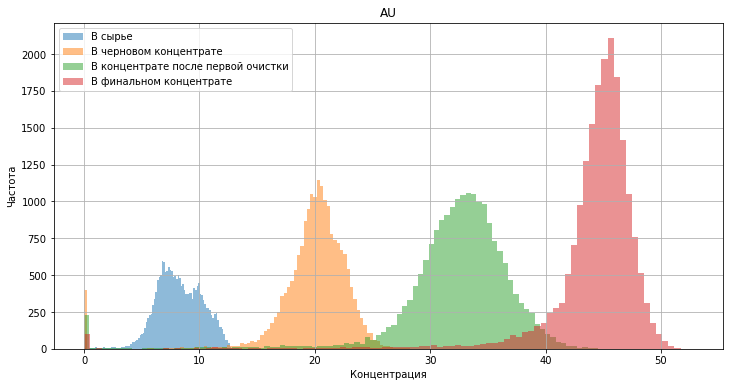

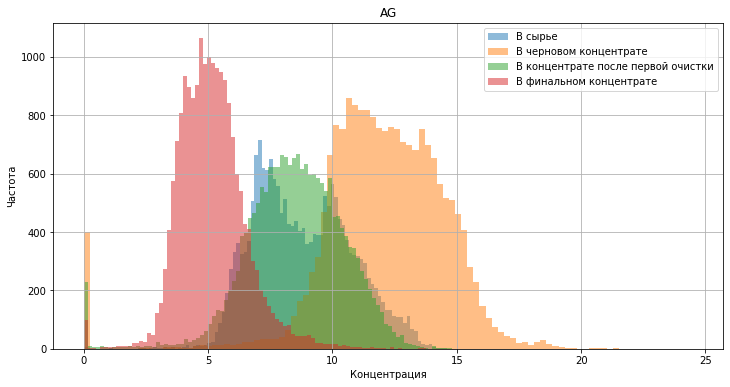

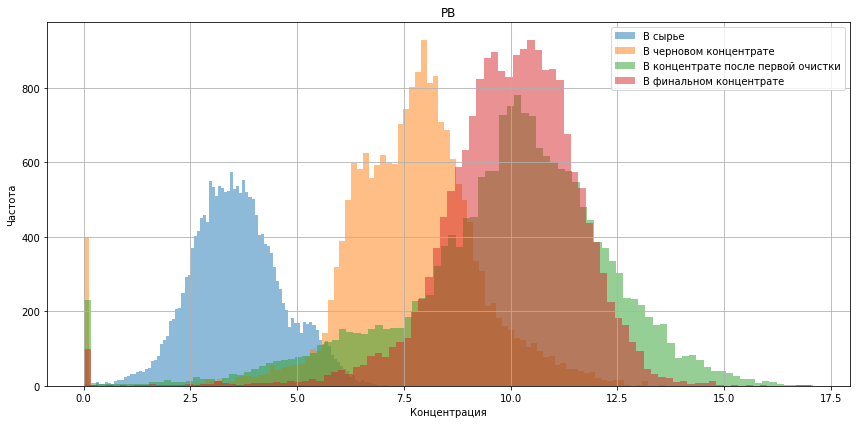

In [27]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
stage_names = ['В сырье', 'В черновом концентрате', 'В концентрате после первой очистки', 'В финальном концентрате']

for metal in metals:
    plt.figure(figsize=(12, 6))
    for stage, stage_name in zip(stages, stage_names):
        column = stage + metal
        plt.hist(data_full[column], bins=100, alpha=0.5, label=stage_name)

    plt.title(metal.upper())
    plt.xlabel('Концентрация')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.legend()

# Размещаем графики вертикально
plt.tight_layout()
plt.show()

**Динамика изменения концентрации металлов на разных этапах очистки:**

1. **Золото (Au):**
   - Концентрация золота постепенно повышается на каждом этапе очистки.
   
2. **Серебро (Ag):**
   - Концентрация серебра также увеличивается на начальных этапах очистки. 
   
3. **Свинец (Pb):**
   - Концентрация свинца сначала повышается, а затем продолжает увеличиваться на всех последующих этапах очистки.

Таким образом, данные графики позволяют нам наглядно увидеть, как каждый металл реагирует на процесс очистки и как изменяется его концентрация на разных этапах.

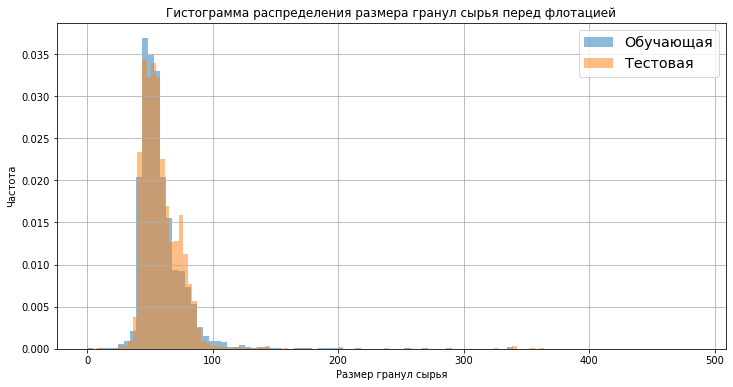

In [28]:
#Гистограмма распределения размера гранул сырья перед флотацией
plt.figure(figsize=(12, 6))
plt.hist(good_train['rougher.input.feed_size'], bins=100, label='Обучающая', alpha=.5, density=True)
plt.hist(good_test['rougher.input.feed_size'], bins=100, label='Тестовая', alpha=.5, density=True)
plt.title('Гистограмма распределения размера гранул сырья перед флотацией')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Частота')
plt.legend(loc='upper right', fontsize='x-large')
plt.grid(True)
plt.show()

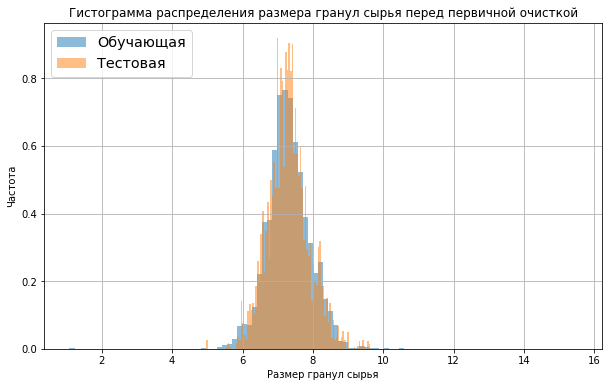

In [29]:
#Гистограмма распределения размера гранул сырья перед флотацией
plt.figure(figsize=(10, 6))
plt.hist(good_train['primary_cleaner.input.feed_size'], bins=100, label='Обучающая', alpha=.5, density=True)
plt.hist(good_test['primary_cleaner.input.feed_size'], bins=100, label='Тестовая', alpha=.5, density=True)
plt.title('Гистограмма распределения размера гранул сырья перед первичной очисткой')
plt.xlabel('Размер гранул сырья')
plt.ylabel('Частота')
plt.legend(loc='upper left', fontsize='x-large')
plt.grid(True)
plt.show()

In [30]:
print(good_train['rougher.input.feed_size'].describe())
print('\n', good_test['rougher.input.feed_size'].describe())

count    14579.000000

mean        59.070865

std         22.903811

min          0.049194

25%         47.322462

50%         54.464259

75%         64.469177

max        484.967466

Name: rougher.input.feed_size, dtype: float64



 count    4860.000000

mean       59.136150

std        19.512497

min         0.046369

25%        47.610795

50%        55.461058

75%        66.538910

max       363.989699

Name: rougher.input.feed_size, dtype: float64


1. Cтандартное отклонение в обоих наборах примерно одинаково.
2. Cреднее значение и медиана размера гранул сырья в обучающем наборе немного больше, чем в тестовом наборе.
3. Распределение в целом нормальное в обеих выборках.

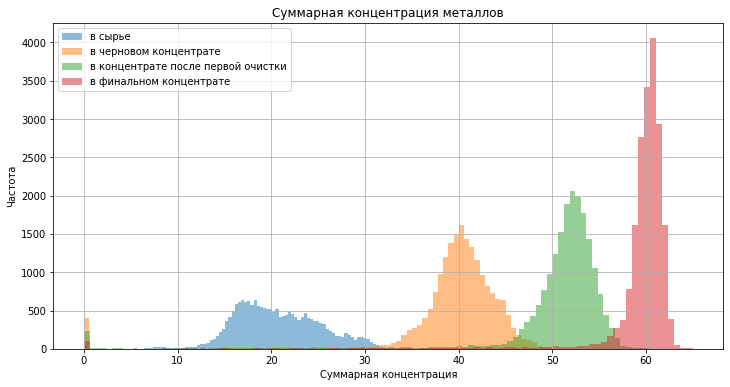

In [31]:
stages = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
stage_names = ['в сырье', 'в черновом концентрате', 'в концентрате после первой очистки', 'в финальном концентрате']
metals = ['au', 'ag', 'pb']
data = data_full

plt.figure(figsize=(12, 6))

for stage, stage_name in zip(stages, stage_names):
    data['sum_'+stage] = data[[stage+metal for metal in metals]].sum(axis=1)
    plt.hist(data['sum_'+stage], bins=100, alpha=0.5, label=stage_name)

plt.title('Суммарная концентрация металлов')
plt.xlabel('Суммарная концентрация')
plt.ylabel('Частота')
plt.grid(True)
plt.legend()
plt.show()

**Динамика изменения суммарной концентрации металлов на разных этапах очистки:**

На графике показано, как суммарная концентрация металлов (золота, серебра и свинца) меняется на разных этапах очистки: от сырья до финального концентрата.

Интересно заметить, что суммарная концентрация металлов снижается по мере прохождения через этапы очистки. Это может быть связано с тем, что процессы очистки и извлечения металлов, хотя и увеличивают концентрацию целевых металлов, также могут сопровождаться потерей других металлов или материалов.

Больше количество аномалий в нулевых значениях.

In [32]:
good_train[good_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

214

In [33]:
good_train = good_train.drop(good_train[good_train['primary_cleaner.output.concentrate_au'] == 0].index)

good_train[good_train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol


В ходе анализа данных были исследованы следующие аспекты:

1. Концентрация металлов (золота, серебра, свинца) на разных этапах очистки. Графики позволили оценить динамику изменения концентрации металлов на различных этапах технологического процесса.

2. Размер гранул сырья на обучающей и тестовой выборках. Исследование показало, что размер гранул сырья в обучающей и тестовой выборках имеет схожее распределение, что является важной информацией для модели.

3. Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Анализ суммарной концентрации помог выявить аномалии и выбросы данных.

## Модель

In [34]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2 )) * 100
    return error

In [35]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [36]:
#Создаем из sMAPE метрику для оценки модели с минимизацией значения
custom_score = make_scorer(sMAPE,greater_is_better=False)

In [37]:
#Удаление ненужных столбцов из обучающего датасета на основе final_features
delete_1 = set(good_train.columns) - final_features
print(delete_1)
train_dataset_final = good_train.drop(delete_1, axis=1)
print('\n', train_dataset_final.columns)

{'rougher.output.tail_pb', 'final.output.concentrate_pb', 'final.output.tail_au', 'secondary_cleaner.output.tail_pb', 'rougher.output.tail_ag', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_sol', 'rougher.output.recovery', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_ag', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_sol', 'rougher.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.tail_ag', 'primary_cleaner.output.tail_au', 'rougher.output.tail_sol', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_au', 'final.output.concentrate_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_ag', 'final.output.ta

In [38]:
#Удаление ненужных столбцов из обучающего датасета на основе rougher_features
delete_1 = set(train_dataset_final.columns) - rougher_features
print(delete_1)
train_dataset_rougher = train_dataset_final.drop(delete_1, axis=1)
print('\n', train_dataset_rougher.columns)

{'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank2_a_level', 'rougher.input.feed_size', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank6_a_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank3_b_level', 'rougher.input.feed_rate', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank2_a_air', 'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_level', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank5_b_level', 'rougher.input.feed_sol', 'secondary_cleaner.state.floatbank3_a_level', 'rougher.state.floatbank10_a_air', 'secondary_cleaner.state.floatbank4_b_level', 'rougher.state.floatbank10_b_air', 'rougher.input.floatbank10_sulfate', 'secondary_cleaner.state.floatbank5_a_level', 'rougher.in

In [39]:
#Извлечение целевых признаков для rougher.output.recovery и final.output.recovery
train_rougher = good_train['rougher.output.recovery']
train_final = good_train['final.output.recovery']

In [40]:
test_feauters_final = good_test.drop('date', axis=1)
delete_2 = set(test_feauters_final.columns) - rougher_features
test_features_rougher = test_feauters_final.drop(delete_2, axis=1)

In [41]:
#Создание пайплайна для Random Forest Regressor
pipeline_rf = make_pipeline(StandardScaler(), RandomForestRegressor())
# Создание пайплайна для Decision Tree Regressor
pipeline_dt = make_pipeline(StandardScaler(), DecisionTreeRegressor())

In [42]:
#Параметры для GridSearchCV с Random Forest
param_grid_RF = {
    "randomforestregressor__n_estimators": [5, 100],
    "randomforestregressor__max_depth": [1, 10]
}
# Параметры для GridSearchCV с Decision Tree
param_grid_DT = {
    "decisiontreeregressor__max_depth": [1, 10]
}

In [43]:
#Создание объекта GridSearchCV для Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_RF, scoring=custom_score)
grid_search_rf_final = GridSearchCV(pipeline_rf, param_grid=param_grid_RF, scoring=custom_score)
#Создание объекта GridSearchCV для Decision Tree
grid_search_df = GridSearchCV(pipeline_dt, param_grid=param_grid_DT, scoring=custom_score)
grid_search_df_final = GridSearchCV(pipeline_dt, param_grid=param_grid_DT, scoring=custom_score)

In [44]:
grid_search_rf.fit(train_dataset_rougher, train_rougher)
grid_search_rf_final.fit(train_dataset_final, train_final)
grid_search_df.fit(train_dataset_rougher, train_rougher)
grid_search_df_final.fit(train_dataset_final, train_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [1, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [45]:
print(grid_search_rf.best_estimator_)
print(grid_search_rf_final.best_estimator_)
print(grid_search_df.best_estimator_)
print(grid_search_df_final.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),

                ('randomforestregressor',

                 RandomForestRegressor(max_depth=1, n_estimators=5))])

Pipeline(steps=[('standardscaler', StandardScaler()),

                ('randomforestregressor', RandomForestRegressor(max_depth=1))])

Pipeline(steps=[('standardscaler', StandardScaler()),

                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])

Pipeline(steps=[('standardscaler', StandardScaler()),

                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])


In [62]:
#Определяем лучшую модель
print("Rougher", "\nRandomForest",grid_search_rf.best_score_,"DecisionTree",grid_search_df.best_score_)
print("Final", "\nRandomForest",grid_search_rf_final.best_score_,"DecisionTree",grid_search_df_final.best_score_)

Rougher 

RandomForest -14.63953335353331 DecisionTree -14.78006022731486

Final 

RandomForest -10.777945169905859 DecisionTree -11.060643513448815


In [63]:
final_sMAPE(grid_search_rf.best_score_, grid_search_rf_final.best_score_)

-11.74334221581272

In [64]:
final_sMAPE(grid_search_df.best_score_, grid_search_df_final.best_score_)

-11.990497691915326

In [48]:
merge_columns = ['date', 'rougher.output.recovery', 'final.output.recovery']

target = good_test.reset_index().merge(
    data_full.loc[:, merge_columns].reset_index(), on='date'
)

In [49]:
target.reset_index(drop=True, inplace=True)

In [50]:
target_for_rougher = target["rougher.output.recovery"]
target_for_final = target["final.output.recovery"]

In [68]:
target_for_rougher

0       89.514960
1       89.858126
2       91.816623
3       88.478959
4       89.230316
          ...    
4855    85.462226
4856    85.443505
4857    87.235441
4858    89.299981
4859    87.650868
Name: rougher.output.recovery, Length: 4860, dtype: float64

In [69]:
target_for_final

0       70.281454
1       65.523246
2       74.817644
3       63.082720
4       74.463380
          ...    
4855    68.786981
4856    67.839536
4857    70.847012
4858    72.659046
4859    70.279619
Name: final.output.recovery, Length: 4860, dtype: float64

In [70]:
# without_nan = set(test_feauters_final.index)
# rougher_recovery = data_full.loc[without_nan,'rougher.output.recovery'].reset_index(drop=True)
# final_recovery = data_full.loc[without_nan, 'final.output.recovery'].reset_index(drop=True)
# without_nan = without_nan.intersection(set(rougher_recovery.index), set(final_recovery.index))

In [71]:
# final_recovery = data_full.loc[without_nan,'final.output.recovery']
# test_features_rougher = test_features_rougher.loc[without_nan,:]
# test_feauters_final = test_feauters_final.loc[without_nan,:]

In [62]:
rogher_test = grid_search_rf.predict(test_features_rougher)
final_test = grid_search_rf_final.predict(test_feauters_final)

# Финальная ошибка на тестовой выборке

In [63]:
final_sMAPE(sMAPE(target_for_rougher,rogher_test),sMAPE(target_for_final,final_test))

7.610124510008314

In [64]:
dummy_rougher = DummyRegressor(strategy="median")
dummy_rougher.fit(train_dataset_rougher, train_rougher)
dummy_rougher_pred = dummy_rougher.predict(rogher_test)
smape_rougher = sMAPE(target_for_rougher, dummy_rougher_pred)
print(smape_rougher) 

5.867006949717248


In [65]:
dummy_final = DummyRegressor(strategy="median")
dummy_final.fit(train_dataset_final, train_final)
dummy_final_pred = dummy_final.predict(final_test)
smape_final = sMAPE(target_for_final, dummy_final_pred)
print(smape_final) 

9.128995052341429


In [66]:
res = final_sMAPE(smape_rougher,smape_final)
display(res)

8.313498026685384

# Вывод

В рамках данного проекта была проведена работа по подготовке и анализу данных в области обогащения золота из золотосодержащей руды для оптимизации производства на промышленных предприятиях. Процесс обогащения золота включает в себя несколько этапов: флотация, очистка и финальное обогащение.

Были выполнены следующие шаги:

1. Загрузка данных: Данные были загружены из предоставленных файлов `gold_industry_train.csv`, `gold_industry_test.csv` и `gold_industry_full.csv`. В случае недоступности локальных файлов, данные были загружены из внешних источников.

2. Предварительный анализ данных: Были изучены данные и их структура, а также описаны признаки и их значения. Выявлены следующие этапы процесса обогащения: флотация, очистка, и финальное обогащение. Также были рассмотрены параметры и характеристики каждого этапа.

3. Подготовка данных: В данных были обнаружены пропуски, которые были обработаны с учетом специфики задачи и типов данных.

4. Исследовательский анализ данных (EDA): Были построены гистограммы распределения концентраций металлов (золота, серебра, свинца) на различных этапах обогащения. Также были рассмотрены распределения размеров гранул сырья и суммарной концентрации всех веществ на разных стадиях процесса.

5. Моделирование: Для предсказания эффективности обогащения золота на этапах флотации и финального обогащения были созданы модели машинного обучения. Использовались модели Random Forest и Decision Tree. Проведен поиск оптимальных гиперпараметров для каждой модели с использованием GridSearchCV.

6. Оценка моделей: Модели были оценены с использованием метрики Symmetric Mean Absolute Percentage Error (sMAPE). Оценка проводилась для обоих этапов обогащения (флотация и финальное обогащение). Модель с наименьшим значением sMAPE считается наиболее эффективной.

**Выводы**

1. Проведен анализ данных, выявлены ключевые этапы процесса обогащения и описаны характеристики признаков на каждом этапе.

2. Произведена подготовка данных, включая обработку пропусков и удаление нулевых значений в целевых признаках.

3. Построены гистограммы распределения концентраций металлов и размеров гранул сырья на различных этапах обогащения.

4. Созданы и обучены модели машинного обучения (Random Forest и Decision Tree) для предсказания эффективности обогащения золота на разных этапах.

5. Оценены модели с использованием метрики sMAPE. Модель DecisionTreeRegressor (с параметрами Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))]) показала лучшие результаты по этой метрике.

6. Вывод: Модель DecisionTreeRegressor может быть использована для оптимизации производства на промышленных предприятиях, предсказывая эффективность обогащения золота на разных этапах обработки руды. Метрика sMAPE может быть использована для оценки качества модели и её эффективности.

7. Ошибка на тестовой выборке: 8.39, на константной 7.49

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке